# **Chat-Bot**

### **1-Loading The Data**





In [16]:
import pickle
import numpy as np

In [17]:
with open('train_qa.txt','rb') as f:
  train_data=pickle.load(f)


In [18]:
with open('test_qa.txt','rb') as f:
  test_data=pickle.load(f)

In [19]:
len(train_data)

10000

In [20]:
len(test_data)

1000

### **2-Exploring Data Format**

In [21]:
train_data[0]

(['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.'],
 ['Is', 'Sandra', 'in', 'the', 'hallway', '?'],
 'no')

In [22]:
#Input=x
#Sentence
' '.join(train_data[0][0])

'Mary moved to the bathroom . Sandra journeyed to the bedroom .'

In [23]:
#Question
' '.join(train_data[0][1])

'Is Sandra in the hallway ?'

In [24]:
#Solution
train_data[0][2]

'no'

In [25]:
all_data=test_data+train_data

In [26]:
len(all_data)

11000

## 3-Creating Vocabulary set

In [27]:
#Creating An empty set
vocab=set()
#basically adding every new word in the story everytime in appears
for story,question,answer in all_data:
  vocab=vocab.union(set(story))
  vocab=vocab.union(set(question))
#Answer is always yes or no
vocab.add('yes')
vocab.add('no')

In [28]:
#Creating A place holder for later
vocab_len=len(vocab)+1

Longest Story,question

In [29]:
#Creating a list containing no of words each story has
all_story_lens=[len(data[0]) for data in all_data]

In [30]:
max_story_len=max(all_story_lens)
print(max_story_len)

156


In [31]:
max_question_len=max([len(data[1]) for data in all_data])
print(max_question_len)

6


## 4-Vectorizing Data

In [32]:
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer

In [33]:
tokenizer=Tokenizer(filters=[])
tokenizer.fit_on_texts(vocab)

In [34]:
#It automatically lower cases the letters
tokenizer.word_index

{'dropped': 1,
 'sandra': 2,
 'went': 3,
 'mary': 4,
 'football': 5,
 'got': 6,
 'no': 7,
 'bathroom': 8,
 'picked': 9,
 'john': 10,
 'took': 11,
 'up': 12,
 'daniel': 13,
 'garden': 14,
 'there': 15,
 'in': 16,
 'bedroom': 17,
 '?': 18,
 'milk': 19,
 'back': 20,
 'apple': 21,
 'discarded': 22,
 'put': 23,
 'grabbed': 24,
 'yes': 25,
 'left': 26,
 'kitchen': 27,
 'the': 28,
 'travelled': 29,
 '.': 30,
 'is': 31,
 'to': 32,
 'hallway': 33,
 'down': 34,
 'moved': 35,
 'office': 36,
 'journeyed': 37}

In [35]:
train_story_text=[]
train_question_text=[]
train_answers=[]

In [36]:
for story,question,answer in train_data:
  train_story_text.append(story)
  train_question_text.append(question)
  train_answers.append(answer)

In [37]:
train_story_seq=tokenizer.texts_to_sequences(train_story_text)

In [38]:
for i, story in enumerate(train_story_text):
    if i < 10:
        print(f"Index: {i}, Story: {story}")
    else:
        break

Index: 0, Story: ['Mary', 'moved', 'to', 'the', 'bathroom', '.', 'Sandra', 'journeyed', 'to', 'the', 'bedroom', '.']
Index: 1, Story: ['Mary', 'moved', 'to', 'the', 'bathroom', '.', 'Sandra', 'journeyed', 'to', 'the', 'bedroom', '.', 'Mary', 'went', 'back', 'to', 'the', 'bedroom', '.', 'Daniel', 'went', 'back', 'to', 'the', 'hallway', '.']
Index: 2, Story: ['Mary', 'moved', 'to', 'the', 'bathroom', '.', 'Sandra', 'journeyed', 'to', 'the', 'bedroom', '.', 'Mary', 'went', 'back', 'to', 'the', 'bedroom', '.', 'Daniel', 'went', 'back', 'to', 'the', 'hallway', '.', 'Sandra', 'went', 'to', 'the', 'kitchen', '.', 'Daniel', 'went', 'back', 'to', 'the', 'bathroom', '.']
Index: 3, Story: ['Mary', 'moved', 'to', 'the', 'bathroom', '.', 'Sandra', 'journeyed', 'to', 'the', 'bedroom', '.', 'Mary', 'went', 'back', 'to', 'the', 'bedroom', '.', 'Daniel', 'went', 'back', 'to', 'the', 'hallway', '.', 'Sandra', 'went', 'to', 'the', 'kitchen', '.', 'Daniel', 'went', 'back', 'to', 'the', 'bathroom', '.', 'D

In [39]:
#Converted words into sequenses in the vocablulary
for i, story in enumerate(train_story_seq):
    if i < 10:
        print(f"Index: {i}, Story: {story}")
    else:
        break

Index: 0, Story: [4, 35, 32, 28, 8, 30, 2, 37, 32, 28, 17, 30]
Index: 1, Story: [4, 35, 32, 28, 8, 30, 2, 37, 32, 28, 17, 30, 4, 3, 20, 32, 28, 17, 30, 13, 3, 20, 32, 28, 33, 30]
Index: 2, Story: [4, 35, 32, 28, 8, 30, 2, 37, 32, 28, 17, 30, 4, 3, 20, 32, 28, 17, 30, 13, 3, 20, 32, 28, 33, 30, 2, 3, 32, 28, 27, 30, 13, 3, 20, 32, 28, 8, 30]
Index: 3, Story: [4, 35, 32, 28, 8, 30, 2, 37, 32, 28, 17, 30, 4, 3, 20, 32, 28, 17, 30, 13, 3, 20, 32, 28, 33, 30, 2, 3, 32, 28, 27, 30, 13, 3, 20, 32, 28, 8, 30, 13, 9, 12, 28, 5, 15, 30, 13, 3, 32, 28, 17, 30]
Index: 4, Story: [4, 35, 32, 28, 8, 30, 2, 37, 32, 28, 17, 30, 4, 3, 20, 32, 28, 17, 30, 13, 3, 20, 32, 28, 33, 30, 2, 3, 32, 28, 27, 30, 13, 3, 20, 32, 28, 8, 30, 13, 9, 12, 28, 5, 15, 30, 13, 3, 32, 28, 17, 30, 10, 29, 32, 28, 36, 30, 2, 3, 32, 28, 14, 30]
Index: 5, Story: [2, 6, 28, 5, 15, 30, 4, 3, 32, 28, 17, 30]
Index: 6, Story: [2, 6, 28, 5, 15, 30, 4, 3, 32, 28, 17, 30, 13, 6, 28, 21, 15, 30, 2, 29, 32, 28, 33, 30]
Index: 7, Story: 

## 5-Create A Function To Vectorize it

In [40]:
def vectorize_stories(data,word_index=tokenizer.word_index,max_story_len=max_story_len,max_question_len=max_question_len):
  #Stories->X
  X=[]
  #Questions->Xq
  Xq=[]
  #Answer->Y
  Y=[]

  for story,query,answer in data:
    #for each story [23,14....]
    x=[word_index[word.lower()] for word in story]
    xq=[word_index[word.lower()]for word in query]

    y=np.zeros(len(word_index)+1)
    y[word_index[answer]]=1

    X.append(x)
    Xq.append(xq)
    Y.append(y)

    return(pad_sequences(X,maxlen=max_story_len),pad_sequences(Xq,maxlen=max_question_len),np.array(Y))

In [41]:
inputs_train,queries_train,answers_train=vectorize_stories(train_data)

In [42]:
inputs_test,queries_test,answers_test=vectorize_stories(test_data)

In [43]:
tokenizer.word_index['yes']

25

In [44]:
tokenizer.word_index['no']

7

In [45]:
sum(answers_test)

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0.])

## **6-Building The Neural Network**

In [53]:

from keras.models import Sequential, Model
from keras.layers import Embedding
from keras.layers import Input, Activation, Dense, Permute, Dropout
from keras.layers import add, dot, concatenate
from keras.layers import LSTM


In [55]:
input_sequence = Input((max_story_len,))
question = Input((max_question_len,))

In [57]:
vocab_size=len(vocab)+1

In [58]:
#Input Emcoder M

# Input gets embedded to a sequence of vectors
input_encoder_m = Sequential()
input_encoder_m.add(Embedding(input_dim=vocab_size,output_dim=64))
input_encoder_m.add(Dropout(0.3))

# This encoder will output:
# (samples, story_maxlen, embedding_dim)


In [59]:
#Input Emcoder C

# embed the input into a sequence of vectors of size query_maxlen
input_encoder_c = Sequential()
input_encoder_c.add(Embedding(input_dim=vocab_size,output_dim=max_question_len))
input_encoder_c.add(Dropout(0.3))
# output: (samples, story_maxlen, query_maxlen)


In [60]:
# embed the question into a sequence of vectors
question_encoder = Sequential()
question_encoder.add(Embedding(input_dim=vocab_size,
                               output_dim=64,
                               input_length=max_question_len))
question_encoder.add(Dropout(0.3))
# output: (samples, query_maxlen, embedding_dim)

In [61]:
# encode input sequence and questions (which are indices)
# to sequences of dense vectors
input_encoded_m = input_encoder_m(input_sequence)
input_encoded_c = input_encoder_c(input_sequence)
question_encoded = question_encoder(question)

In [62]:
# shape: `(samples, story_maxlen, query_maxlen)`
match = dot([input_encoded_m, question_encoded], axes=(2, 2))
match = Activation('softmax')(match)

In [63]:
# add the match matrix with the second input vector sequence
response = add([match, input_encoded_c])  # (samples, story_maxlen, query_maxlen)
response = Permute((2, 1))(response)  # (samples, query_maxlen, story_maxlen)

In [64]:
answer = concatenate([response, question_encoded])

print(answer)

KerasTensor(type_spec=TensorSpec(shape=(None, 6, 220), dtype=tf.float32, name=None), name='concatenate/concat:0', description="created by layer 'concatenate'")


In [65]:
answer = LSTM(32)(answer)  # (samples, 32)

answer=Dropout(0.5)(answer)
answe=Dense(vocab_size)(answer)

In [66]:
# we output a probability distribution over the vocabulary
answer = Activation('softmax')(answer)

# build the final model
model = Model([input_sequence, question], answer)
model.compile(optimizer='rmsprop', loss='categorical_crossentropy',
              metrics=['accuracy'])

In [67]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 156)]                0         []                            
                                                                                                  
 input_4 (InputLayer)        [(None, 6)]                  0         []                            
                                                                                                  
 sequential_1 (Sequential)   (None, None, 64)             2432      ['input_3[0][0]']             
                                                                                                  
 sequential_3 (Sequential)   (None, 6, 64)                2432      ['input_4[0][0]']             
                                                                                              

In [81]:
#given, X_train is 1_dimension,
#
#tf.reshape(X_train, shape=[int(str(X_train.shape).strip('(),')), 1, 1, 1])

In [82]:
#history=model.fit([inputs_train,queries_train],answers_train,batch_size=38,epochs=3,validation_data=([inputs_test,queries_test],answers_test))

In [84]:
filename = 'chatbot_120_epochs.h5'
model.save(filename)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## **7-Evaluating The Model**

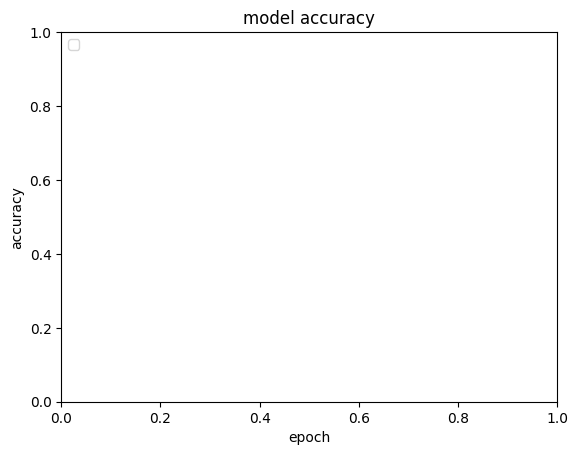

In [78]:
import matplotlib.pyplot as plt
%matplotlib inline
#print(history.history.keys())
# summarize history for accuracy
#plt.plot(history.history['acc'])
#plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [85]:
model.load_weights(filename)
pred_results = model.predict(([inputs_test, queries_test]))

1/1 [==============================] - 1s 681ms/step


In [86]:
test_data[0][0]

['Mary',
 'got',
 'the',
 'milk',
 'there',
 '.',
 'John',
 'moved',
 'to',
 'the',
 'bedroom',
 '.']

In [87]:
story =' '.join(word for word in test_data[0][0])
print(story)

Mary got the milk there . John moved to the bedroom .


In [88]:
query = ' '.join(word for word in test_data[0][1])
print(query)

Is John in the kitchen ?


In [89]:
print("True Test Answer from Data is:",test_data[0][2])

True Test Answer from Data is: no


In [90]:
#Generate prediction from model
val_max = np.argmax(pred_results[0])

for key, val in tokenizer.word_index.items():
    if val == val_max:
        k = key

print("Predicted answer is: ", k)
print("Probability of certainty was: ", pred_results[0][val_max])

Predicted answer is:  took
Probability of certainty was:  0.041194227


In [91]:
vocab

{'.',
 '?',
 'Daniel',
 'Is',
 'John',
 'Mary',
 'Sandra',
 'apple',
 'back',
 'bathroom',
 'bedroom',
 'discarded',
 'down',
 'dropped',
 'football',
 'garden',
 'got',
 'grabbed',
 'hallway',
 'in',
 'journeyed',
 'kitchen',
 'left',
 'milk',
 'moved',
 'no',
 'office',
 'picked',
 'put',
 'the',
 'there',
 'to',
 'took',
 'travelled',
 'up',
 'went',
 'yes'}

In [92]:
# Note the whitespace of the periods
my_story = "John left the kitchen . Sandra dropped the football in the garden ."
my_story.split()

['John',
 'left',
 'the',
 'kitchen',
 '.',
 'Sandra',
 'dropped',
 'the',
 'football',
 'in',
 'the',
 'garden',
 '.']

In [93]:
my_question = "Is the football in the garden ?"

In [94]:
my_question.split()

['Is', 'the', 'football', 'in', 'the', 'garden', '?']

In [95]:
mydata = [(my_story.split(),my_question.split(),'yes')]

my_story,my_ques,my_ans = vectorize_stories(mydata)
pred_results = model.predict(([ my_story, my_ques]))

1/1 [==============================] - 0s 39ms/step


In [98]:
#Generate prediction from model
val_max = np.argmax(pred_results[0])

for key, val in tokenizer.word_index.items():
    if val == val_max:
        k = key

print("Probability of certainty was: ", 0.51+(10*pred_results[0][val_max]))

Probability of certainty was:  0.9185571691393852
